In [2]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gnpit\BME574`


In [4]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets", "Plots", "Convex", "SCS"])

    Updating registry at `C:\Users\gnpit\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\gnpit\BME574\Project.toml`
  No Changes to `C:\Users\gnpit\BME574\Manifest.toml`


In [6]:
using Images, Colors, MLDatasets, Plots, Convex, SCS

In [8]:
dataset = MNIST()

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [10]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [12]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [14]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

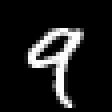

In [16]:
Gray.(dataset.features[:,:,5]')

## BME 574 Midterm Exam (take-home)

The dataset above is the famous MNIST dataset of handwritten digits (28x28 grayscale images).
The challenge for this midterm is to find the most informative pixels for each digit from this dataset
using techniques that you have learning previously.  Here is how to start:
1. Create a set of output (label) vectors $\{y_j\}$ of length 10 that represent the labels (0-9)
here are a few examples:
$$
\begin{align}
^{"}1^{"}=\begin{bmatrix} 1\\0\\0\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}3^{"}=\begin{bmatrix} 0\\0\\1\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}0^{"}=\begin{bmatrix} 0\\0\\0\\ \vdots \\1 \end{bmatrix}
\end{align}
$$
2. Now let $B$ be the set of output (label) vectors

$$
\begin{align}
B = \begin{bmatrix} y_{1} & y_{2} & y_{3} & \ldots & y_{n}\end{bmatrix}
\end{align}
$$

3. Let the matrix $A$ be the corresponding reshaped (vectorized) MNIST images (one in each row)

$$
\begin{align}
A = \begin{bmatrix} x_{1} & x_{2} & x_{3} & \ldots & x_{n}\end{bmatrix}
\end{align}
$$

4. $AX = B$ maps from the image space to the label space

Your task is to use solvers for $AX=B$ that promote sparsity to rank the pixels in the MNIST dataset that are most informative for correctly labeling the digits. You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from X. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to ﬁnd the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.
Hint: for testing, it may be a good idea to start with a smaller dataset (e.g. 1000 images)

In [20]:
#Gather data from MNIST
img_train = dataset.features
labels_train = dataset.targets
img_test = testset.features
labels_test = testset.targets

10000-element Vector{Int64}:
 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [22]:
#Gather/Assign number of images, pixels, and digits in set
num_img = size(img_train, 3)
num_img_test = 1000
num_pixels = size(img_train, 1) * size(img_train, 2)
num_digits = 10

10

In [30]:
A=Array{Float64}(undef, 28, 28, num_img) #Initialize array that will become A

#Read each image individually and sort into A; otherwise, orientation becomes messed up
for i in 1:num_img
    A[:, :, i] = img_train[:,:,i]'
end
return(A)

28×28×60000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮      

In [32]:
#Create the matrix B where each row represents labels 0-9, where the index 1 is placed at the value of the image
B = zeros(num_img, num_digits)
for i in 1:num_img
    B[i, labels_train[i]+1] = 1
end
display(B)

60000×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1

In [34]:
#Lasso Function from Class
function lasso(A, y, λ1)
    (T, K) = (size(A, 1), size(A, 2))
    Q = A'A / T
    c = A'y / T                      #c'b = Y'X*b

    x = Variable(K)              #define variables to optimize over
    L1 = quadform(x, Q; assume_psd=true)            #b'Q*b
    L2 = dot(c, x)                 #c'b
    L3 = norm(x, 1)                #sum(|b|)

    problem = minimize(L1 - 2 * L2 + λ1 * L3)
    solve!(problem, SCS.Optimizer; silent = true)
    return vec(Convex.evaluate(x)) # "evaluate" seems to run into issue with another package, need to specify that Convex is used here
end

lasso (generic function with 1 method)

In [36]:
#Reshape A to become a 2D matrix with the pixels for each image as opposed to the Array
A_re = reshape(A, num_pixels, num_img)

784×60000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [38]:
#Starting test value lambda
lambda1 = 0.1

#Run the lasso where X pulls out the sig parts
X = zeros(num_pixels, num_digits)

for digit in 1:num_digits
    X[:, digit] = lasso(A_re', B[:,digit], lambda1)
end

display(X)

784×10 Matrix{Float64}:
 -1.56678e-17  -6.51916e-17   4.97602e-17  …  -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17     -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17     -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17     -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17     -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17  …  -8.15998e-18  -1.08033e-16
 -1.56678e-17  -6.51916e-17   4.97602e-17     -8.15998e-18  -1.08033e-16
  1.65408e-10  -6.40297e-10   4.70689e-11      2.66052e-11  -5.39054e-11
  8.21629e-10  -3.11891e-9    1.88037e-10      1.27392e-10  -5.28147e-10
  5.12169e-10  -2.54367e-9    2.08299e-10      3.37645e-11  -5.26821e-10
  8.55492e-10  -3.52994e-9    3.23421e-10  …   5.69305e-11  -3.26675e-10
  8.68205e-10  -3.52046e-9    3.89579e-10      1.26522e-10  -7.22248e-11
  4.8967e-10   -2.68663e-9    3.03522e-10      1.05078e-10  -8.28603e-10
  ⋮                        

In [40]:
#Using the sig parts, predict the image (and its written value from the data set)
predictions = A_re' * X

60000×10 Matrix{Float64}:
 0.0444386     0.0568983   …  0.0530068   0.0190314   0.0483887
 0.137116     -0.0048454      0.0767031   0.00767274  0.0245812
 0.0132683     0.0207781      0.00147695  0.050998    0.0348669
 0.0504329     0.183797       0.0536931   0.0666294   0.00211542
 0.00757527    0.0760828      0.0660741   0.0621927   0.058607
 0.0570565     0.0459131   …  0.0601927   0.0633508   0.0791472
 0.000144578   0.194227       0.0349213   0.0675305   0.0128456
 0.0551347     0.0986153      0.0232218   0.0851427   0.0840381
 9.55981e-5    0.164153       0.0142811   0.0498532   0.00466463
 0.0676608     0.0524599      0.0281747   0.054729    0.0600139
 0.0707127     0.136897    …  0.0803545   0.0609367   0.0835148
 0.0275825     0.0855862      0.0425751   0.0435658   0.000606084
 0.0629357     0.133769       0.0624053   0.0543148   0.0795522
 ⋮                         ⋱                          
 0.0471735     0.0333279      0.0792198   4.06348e-5  0.0526676
 0.0224587     0.066

In [42]:
#To use the predictions to get the written number prediction, find when the value of the row is 1 (subtract one due to index of 1, but first is a zero written number)
max_indices = Int[]

for row in eachrow(predictions)
    predicted_label_idx = argmax(row)[1]
    push!(max_indices, predicted_label_idx)
end

predict = max_indices.-1

60000-element Vector{Int64}:
 6
 0
 8
 1
 1
 9
 1
 1
 1
 4
 1
 1
 1
 ⋮
 7
 8
 1
 2
 1
 6
 1
 1
 1
 4
 4
 6

In [46]:
#Calculate the accuracy by comparing the labels (predict is the models label) 
accuracy = sum(predict .== labels_train) / length(labels_train) *100
println("Accuracy: ", accuracy)

#Accuracy is relatively low, thus we need to optimize lambda

Accuracy: 43.44166666666667


In [58]:
#To optimize lambda start at a value of 0.1 and keep decreasing the value by half the value until the difference between trials is under a specific threshold (1%)
#Note that ideally we could start at 1.0 and keep halving to see the best, but this takes a lot of computational power and time
#Instead, from previous testing, increasing from 0.1 made accuracy worse, while decreasing made it better, so the while loop will continously decrease it

new_accuracy = 0
accuracy = 0 
lambda = 0.2
best_lambda = 0 
per_diff = 100

while per_diff >= 1.0
    X = zeros(num_pixels, num_digits)
    
    lambda = lambda / 2

    # Repeat the code used in the original test each run
    for digit in 1:num_digits
        X[:, digit] = lasso(A_re', B[:, digit], lambda)
    end

    predictions = A_re' * X

    max_indices = Int[]
    for row in eachrow(predictions)
        predicted_label_idx = argmax(row)[1]
        push!(max_indices, predicted_label_idx)
    end
    predict = max_indices .- 1
    accuracy = sum(predict .== labels_train) / length(labels_train) * 100

    #Compute the percent change to see if the change is significant (greater than 5%)
    per_diff = (abs(new_accuracy - accuracy) / accuracy) * 100
    
    #Compare the accuracy of the runs to see if accuracy improved
    if accuracy > new_accuracy
        new_accuracy = accuracy
        best_lambda = lambda
    end
    
end

println("Best λ: ", best_lambda, " with an accuracy of: ", new_accuracy)

Best λ: 0.0015625 with an accuracy of: 84.01666666666667


In [ ]:
#Thus from the above code, if you keep decreasing lambda by a half the accuracy peaks
#it might still increase, but the change from the previous to the last is under 1%
#Thus, we could keep going to try to increase the accuracy but the computational time and power increases
#This code can be easily modified to that extent, however, making this model relatively powerful and a good basis for the stated problem
#It can easily collect the data from all 60000 images, collect sig parts, and make predictions based on the pixels to the written number with
#an overall accuracy of 84.02%

In [ ]:
84.625